# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
       
        
    

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#City Number and City Name
city_number = 1
city_name = []
lat = []
lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Date = []
Country = []
Wind_speed = []


#original URL to create API call
#original_url = 'api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}'
                    
#print('''') 


#dataframe results
#weather.()  

for city in cities[:5]:
    first_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
                         
    #preform weather check for each city using API
    city_data = requests.get(first_url).json()
    
    #print(f'Processing Weather Data for Record{city_number} of Set {city_name} | {response["name"]}')
    
#     #Data in the Dataframe
#     weather.head[index, 'Cloudiness'] = reponse['clouds']['all']
#     weather.head[index, 'Date'] = reponse['dt']
#     weather.head[index, 'Humidity'] = reponse['main']['humidity']
#     weather.head[index, 'Lat'] = reponse['coord']['lat']
#     weather.head[index, 'Lng'] = reponse['cood']['lon']
#     weather.head[index, 'Max Temp'] = reponse['main']['temp_max']
#     weather.head[index, 'Windspeed'] = reponse['wind']['speed'] 
    
    
    #just in case city is not found in the API 
    try:
        
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        Max_Temp.append(city_data['main']['temp_max'])
        Humidity.append(city_data['main']['humidity'])
        Cloudiness.append(city_data['clouds']['all'])
        Wind_speed.append(city_data['wind']['speed'])
        Country.append(city_data['sys']['country'])
        Date.append(city_data['dt'])
        city_name.append(city)
        
        print(f'City Number{city_number} of {len(cities)} complete | {city}')
        city_number += 1
        
    except:
        print('city not found')
        pass
    
    time.sleep(1)

      

                

City Number1 of 593 complete | pandan
City Number2 of 593 complete | nokha
City Number3 of 593 complete | pingyin
City Number4 of 593 complete | alexandria
City Number5 of 593 complete | saskylakh


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Creating a dataframe
#weather = {}
#weather = ()


#Create a weather for each city from the stored data
weather = pd.DataFrame({'City': city_name, 'Cloudiness': Cloudiness, 'Country': Country, 'Date': Date, 'Humidity': Humidity, 
                        'Lat': lat, 'Lng': lng, 'Max Temp': Max_Temp, 'Windspeed': Wind_speed})

#weather.to_csv("output_data/cities.csv")

#print dataframe
weather.head()

#weather['Max Temp'] = weather['Max Temp'].replace


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,pandan,20,PH,1620179267,81,14.0453,124.1694,301.78,5.09
1,nokha,30,IN,1620179270,26,27.6000,73.4167,302.89,5.61
2,pingyin,1,CN,1620179273,16,36.2831,116.4453,295.77,4.80
3,alexandria,0,EG,1620178622,64,31.2156,29.9553,296.15,2.06
4,saskylakh,99,RU,1620179278,93,71.9167,114.0833,272.17,3.93


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
alkjsdlfkajsdlfkjalskdjf

In [5]:
#  Get the indices of cities that have humidity over 100%.


In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

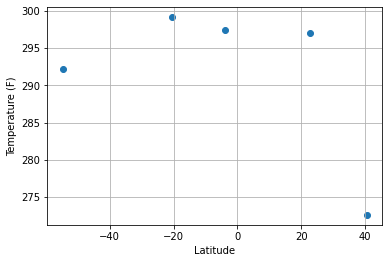

In [27]:
#Scatter Plot for Data Type
plt.scatter(weather['Lat'], weather['Max Temp'], marker='o')

#Graph plots
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.grid('Latitude vs. Temperture')
#plt.savefig(weather)

#Show plot
plt.show()

## Latitude vs. Humidity Plot

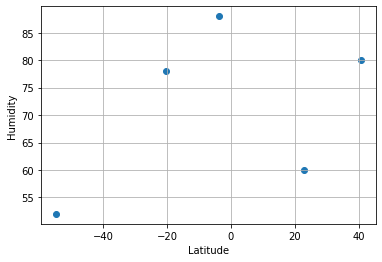

In [28]:
#Scatter Plot for Data Type
plt.scatter(weather['Lat'], weather['Humidity'], marker='o')

#Graph plots
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)


#plt.savefig(weather)

#Show plot
plt.show()

## Latitude vs. Cloudiness Plot

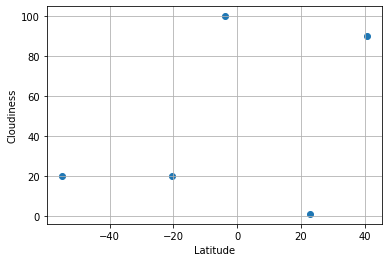

In [29]:
#Scatter Plot for Data Type
plt.scatter(weather['Lat'], weather['Cloudiness'], marker='o')

#Graph plots
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)
plt.grid('Latitude vs. Cloudiness')
#plt.savefig(weather)

#Show plot
plt.show()

## Latitude vs. Wind Speed Plot

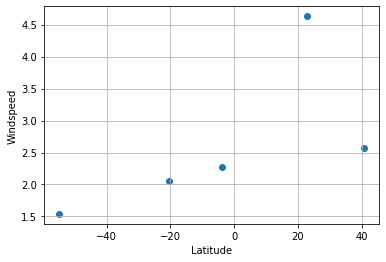

In [30]:
#Scatter Plot for Data Type
plt.scatter(weather['Lat'], weather['Windspeed'], marker='o')

#Graph plots
plt.ylabel('Windspeed')
plt.xlabel('Latitude')
plt.grid(True)
plt.grid('Latitude vs. Windspeed')
#plt.savefig(weather)

#Show plot
plt.show()

## Linear Regression

In [34]:
#Defining Linear Regression

def plt(xdat,ydat,xline,yline,xycord,jfig):
    slope, intercept, r_value, p_value, std_err = linregress(xdat,ydat)
    print(f'the r-squared is: {r_value}')
    regress_values = x * slope + intercept
    line_eq = 'y =' + str(round(slope,2)) + 'x + ' +str(round(intercept,2))

#plt.scatter(xdat,ydat)
#plt.plot(xdat,regress_values,"r-")
#plt.annotate(line_eq,xycord,fontsize=11,color='red')
plt.xlabel(xline)
plt.ylabel(yline)
plt.savefig(f'output_data/fig{ifig}.png')
plt.show()

#volume_avg_df
#plt.show()

AttributeError: 'function' object has no attribute 'xlabel'

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
x = 'lat'
y = 'Max Temp'
lblpos = (0,25)
#plotlinearregession(northern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)

plt.show()

NameError: name 'plt' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression